# Table of Contents

# 01. Importing Libraries

# 02. Importing Data

# 03. Cleaning Data

# 04. The Elbow Technique

# 05. k-means Clustering

# 01. Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [5]:
# this option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically

%matplotlib inline

# 02. Importing Data

In [6]:
path = r'C:\Users\ketki\Desktop\Data Analytics bootcamp tasks\Data Immersion\Achievement 6'

In [8]:
df_2019 = pd.read_csv(os.path.join(path, 'Data', 'Prepared data','2019_checked.csv'))

# 03. Cleaning Data

In [9]:
df_2019.shape

(156, 10)

In [10]:
df_2019.head()

,Unnamed: 0,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [11]:
# dropping the unnamed column

df_2019 = df_2019.drop('Unnamed: 0', axis=1)

In [18]:
df_2019 = df_2019.drop('Country', axis = 1)

In [19]:
df_2019.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# 04. The Elbow Technique

In [20]:
# The elbow technique

num_clusters = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in num_c1]

In [21]:
score = [kmeans[i].fit(df_2019).score(df_2019) for i in range(len(kmeans))]

score

C:\Users\ketki\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-316600.5869934103,
 -79209.70638260563,
 -35224.769555480816,
 -19826.61425016039,
 -12715.767293383335,
 -8833.928329457605,
 -6514.129098329545,
 -4967.186625352631,
 -3953.4249628322586]

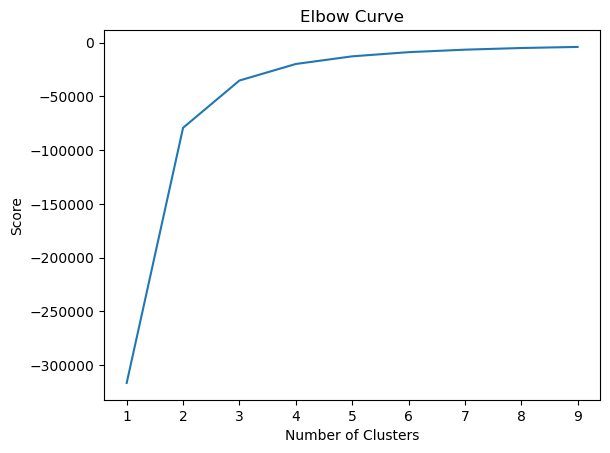

In [35]:
# plot the elbow curve

pl.plot(num_clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The values jump rapidly from 1 to 4 and plateau afer 4. So I will choose the number 4.

# 05. k-means Clustering

In [23]:
# Running the k-means algorithm

kmeans = KMeans(n_clusters = 4)

In [24]:
# fitting kmeans to a dataframe

kmeans.fit(df_2019)

KMeans(n_clusters=4)

In [25]:
# Attaching a new column to the dataframe with the resulting clusters

df_2019['clusters'] = kmeans.fit_predict(df_2019)

In [26]:
df_2019.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,clusters
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,3
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,3
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,3
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,3
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,3


In [27]:
df_2019['clusters'].value_counts()

0    40
1    39
2    39
3    38
Name: clusters, dtype: int64

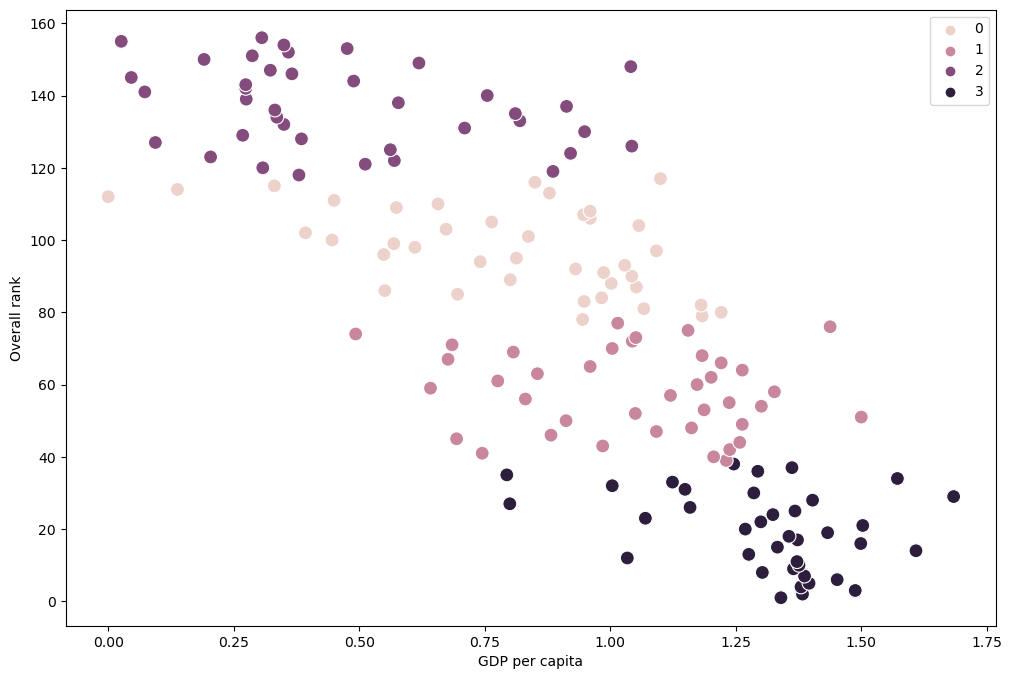

In [29]:
# Creating different visualizations using clustered data
# For GDP per capita and overall rank

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019['GDP per capita'], y=df_2019['Overall rank'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('GDP per capita')
plt.ylabel('Overall rank')
plt.show()

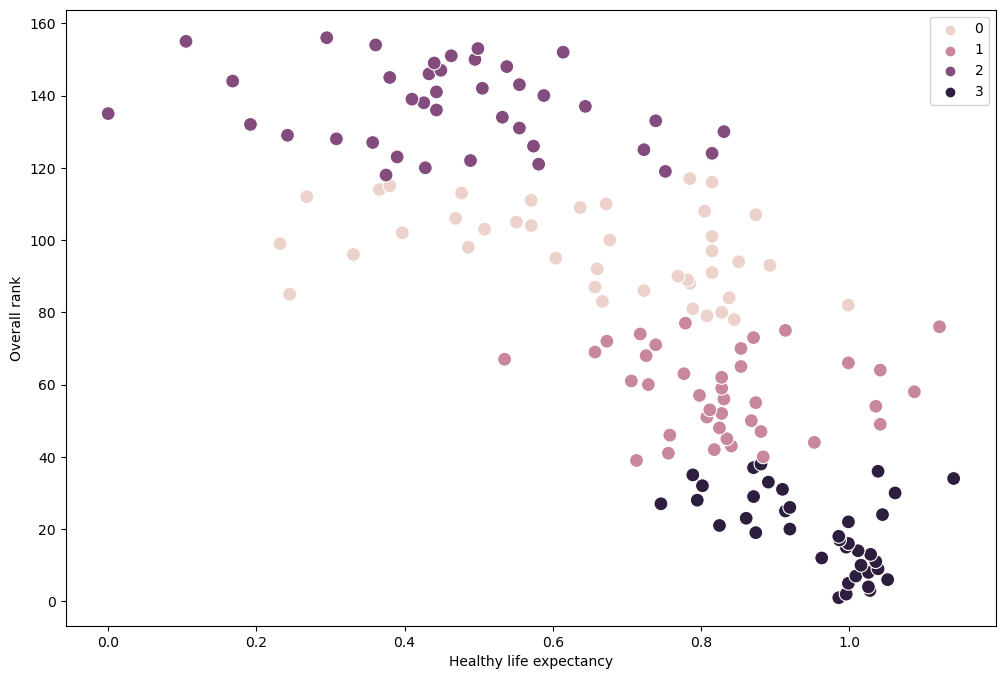

In [30]:
# For Healthy life expectancy vs Overall rank

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019['Healthy life expectancy'], y=df_2019['Overall rank'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Overall rank')
plt.show()

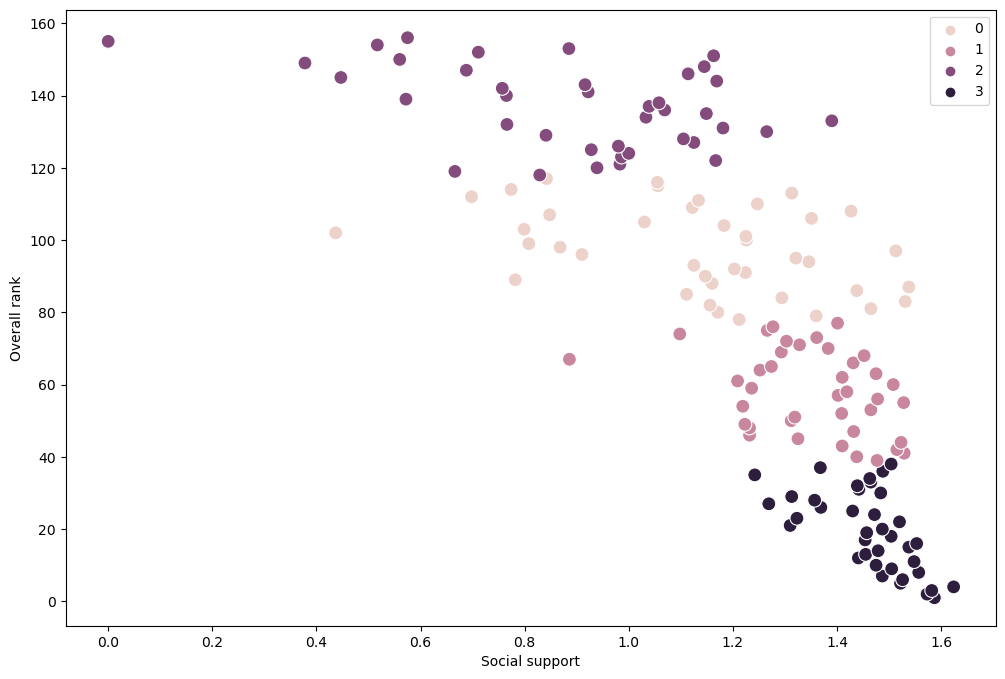

In [31]:
# For Social support vs Overall rank

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2019['Social support'], y=df_2019['Overall rank'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Social support')
plt.ylabel('Overall rank')
plt.show()

There are 4 clusters and they make sense as we see from the plots that the countries that have a good overall rank tend to have the highest value in social support. Also, those countries have a higher healthy life expectancy. 

In [33]:
df_2019.loc[df_2019['clusters'] == 3, 'cluster'] = 'black'
df_2019.loc[df_2019['clusters'] == 2, 'cluster'] = 'dark purple'
df_2019.loc[df_2019['clusters'] == 1, 'cluster'] = 'purple'
df_2019.loc[df_2019['clusters'] == 0, 'cluster'] = 'pink'

In [34]:
df_2019.groupby('cluster').agg({'GDP per capita':['mean', 'median'],
                               'Overall rank':['mean', 'median'],
                               'Healthy life expectancy':['mean', 'median'],
                               'Social support':['mean', 'median']})


GDP per capita         Overall rank         \
                      mean  median         mean median   
cluster                                                  
black             1.312263  1.3590         19.5   19.5   
dark purple       0.473385  0.3660        137.0  137.0   
pink              0.800275  0.8645         97.5   97.5   
purple            1.047795  1.0920         58.0   58.0   

            Healthy life expectancy         Social support          
                               mean  median           mean  median  
cluster                                                             
black                      0.956342  0.9915       1.463474  1.4770  
dark purple                0.465051  0.4490       0.891872  0.9390  
pink                       0.651500  0.6745       1.136250  1.1655  
purple                     0.835897  0.8280       1.352051  1.3830

The black cluster has the best stats in almost all categories. 
This shows us that the countries with better healthy life expectancy and a good social support have a higher rank
when it comes to happiness.
We need to do some further work in regards to the GDP er capita column.